In [1]:
import os
import pandas as pd
# import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [2]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
data = pd.read_csv('../corpus/generated_chords/chromas.csv')
data.set_index('Unnamed: 0', inplace=True)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim


In [4]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
data['true_fixed'] = data['true'].map(fix_meio_dim)

In [5]:
data['true_fixed'].value_counts()

Bdim          357
Fdim          357
Emin7         357
Cmin7         357
Db7           357
Abmaj7        357
Bb7           357
Dmin7         357
D7            357
Cdim          357
E7            357
Adim          357
Ddim          357
Dbmaj7        357
Gbmin7        357
Ebmaj7        357
Gmeio_dim     357
Bbmaj7        357
Abdim         357
Ebmeio_dim    357
Gmin7         357
A7            357
Dbmeio_dim    357
G7            357
Abmeio_dim    357
Edim          357
F7            357
Eb7           357
Ebmin7        357
Bbmin7        357
Bbdim         357
Bmeio_dim     357
Gmaj7         357
Abmin7        357
Gdim          357
Bbmeio_dim    357
Gbmeio_dim    357
Dbdim         357
Ebdim         357
Fmin7         357
Bmaj7         357
Ameio_dim     357
Fmaj7         357
Amin7         357
Dmeio_dim     357
Ab7           357
Gbdim         357
Dmaj7         357
Fmeio_dim     357
B7            357
Dbmin7        357
Emeio_dim     357
C7            357
Gb7           357
Cmeio_dim     357
Bmin7     

In [6]:
# # Opening JSON file
with open('perfect_chromas.json') as json_file:
    perfect_chromas = json.load(json_file)
    
perfect_chromas

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [11]:
dict_chord_number = {}
for i, item in enumerate(perfect_chromas):
    dict_chord_number[item] = i
    
dict_chord_number

{'Cmaj7': 0,
 'Dbmaj7': 1,
 'Dmaj7': 2,
 'Ebmaj7': 3,
 'Emaj7': 4,
 'Fmaj7': 5,
 'Gbmaj7': 6,
 'Gmaj7': 7,
 'Abmaj7': 8,
 'Amaj7': 9,
 'Bbmaj7': 10,
 'Bmaj7': 11,
 'C7': 12,
 'Db7': 13,
 'D7': 14,
 'Eb7': 15,
 'E7': 16,
 'F7': 17,
 'Gb7': 18,
 'G7': 19,
 'Ab7': 20,
 'A7': 21,
 'Bb7': 22,
 'B7': 23,
 'Cmin7': 24,
 'Dbmin7': 25,
 'Dmin7': 26,
 'Ebmin7': 27,
 'Emin7': 28,
 'Fmin7': 29,
 'Gbmin7': 30,
 'Gmin7': 31,
 'Abmin7': 32,
 'Amin7': 33,
 'Bbmin7': 34,
 'Bmin7': 35,
 'Cdim': 36,
 'Dbdim': 37,
 'Ddim': 38,
 'Ebdim': 39,
 'Edim': 40,
 'Fdim': 41,
 'Gbdim': 42,
 'Gdim': 43,
 'Abdim': 44,
 'Adim': 45,
 'Bbdim': 46,
 'Bdim': 47,
 'Cmeio_dim': 48,
 'Dbmeio_dim': 49,
 'Dmeio_dim': 50,
 'Ebmeio_dim': 51,
 'Emeio_dim': 52,
 'Fmeio_dim': 53,
 'Gbmeio_dim': 54,
 'Gmeio_dim': 55,
 'Abmeio_dim': 56,
 'Ameio_dim': 57,
 'Bbmeio_dim': 58,
 'Bmeio_dim': 59}

In [12]:
data['chord_number'] = data['true_fixed'].map(dict_chord_number)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed,chord_number
Unnamed: 0,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim,45
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim,38
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim,38
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim,45
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim,36


In [8]:
# perfect_chromas

In [9]:
# df_chromas_perfeitos = pd.DataFrame(perfect_chromas).transpose().reset_index()
# df_chromas_perfeitos.rename(columns={'index':'true_fixed'}, inplace=True)

# df_chromas_perfeitos#.rename(columns)

In [10]:
# for key, note in enumerate(notes):
    
#     df_chromas_perfeitos.rename(columns={key:note+'_y'}, inplace=True)
    
# df_chromas_perfeitos

In [13]:
df_model = data.copy()
# df_model[df_model.columns[12:]]

df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed,chord_number
Unnamed: 0,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim,45
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim,38
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim,38
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim,45
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fmaj7_venda_clapping_Mandolin.ogg,69767.492188,10917.092773,3025.186279,6115.705566,37238.179688,151804.062500,22289.921875,6690.626465,19415.052734,92760.492188,12004.238281,14845.889648,Fmaj7,Fmaj7,5
Dmaj7_ruchenitza_2_Mandolin.ogg,2852.239258,25762.039062,81828.328125,8800.999023,2272.155029,6662.740234,26583.914062,4418.559082,7592.409668,34652.308594,5687.583984,1605.460327,Dmaj7,Dmaj7,2
Fmaj7_venda_Mandolin.ogg,50651.812500,7893.779297,2139.215576,5089.428223,30508.986328,98325.437500,14360.250977,5048.682129,18134.794922,87040.781250,10811.265625,11076.672852,Fmaj7,Fmaj7,5


In [40]:
df_model[notes].max(axis=1)

Unnamed: 0
Adim_Nawakhat_Flute.ogg               36969.769531
Ddim_york-samai_Flute.ogg             19825.443359
Ddim_agsag-samai_Flute.ogg            40611.800781
Adim_agogo-samba_Flute.ogg           146976.843750
Cdim_agogo-samba_Flute.ogg            74844.898438
                                         ...      
Fmaj7_venda_clapping_Mandolin.ogg    151804.062500
Dmaj7_ruchenitza_2_Mandolin.ogg       81828.328125
Fmaj7_venda_Mandolin.ogg              98325.437500
Gbmaj7_outside_now_Mandolin.ogg      157412.656250
Dmaj7_mpre_Mandolin.ogg              160877.890625
Length: 21420, dtype: float64

In [39]:
df_model['C']/df_model[notes].max(axis=1)#'Fmaj7_venda_clapping_Mandolin.ogg']

Unnamed: 0
Adim_Nawakhat_Flute.ogg              0.561559
Ddim_york-samai_Flute.ogg            0.220726
Ddim_agsag-samai_Flute.ogg           0.117146
Adim_agogo-samba_Flute.ogg           0.338163
Cdim_agogo-samba_Flute.ogg           1.000000
                                       ...   
Fmaj7_venda_clapping_Mandolin.ogg    0.459589
Dmaj7_ruchenitza_2_Mandolin.ogg      0.034856
Fmaj7_venda_Mandolin.ogg             0.515145
Gbmaj7_outside_now_Mandolin.ogg      0.110407
Dmaj7_mpre_Mandolin.ogg              0.057471
Length: 21420, dtype: float64

In [42]:
# normalizando cada coluna
# dividindo pelo valor máximo de cada chroma
for note in notes:
    df_model[note + '_norm'] = df_model[note]/df_model[notes].max(axis=1)

In [43]:
df_model.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.051887,0.421232,0.236172,0.094706,0.436516,0.248160,0.146094,1.000000,0.288199,0.096547
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,...,1.000000,0.330093,0.122460,0.816114,0.296774,0.114733,0.680291,0.222328,0.191659,0.945770
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,...,1.000000,0.252278,0.055663,0.381982,0.245712,0.065826,0.320676,0.154602,0.083041,0.360354
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.049189,0.406956,0.287159,0.130650,0.597580,0.202693,0.140847,1.000000,0.277790,0.066827
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,...,0.072899,0.454796,0.291162,0.094722,0.467447,0.290201,0.152799,0.607044,0.177792,0.114514


In [44]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'chord_number', 'C_norm', 'Db_norm', 'D_norm', 'Eb_norm',
       'E_norm', 'F_norm', 'Gb_norm', 'G_norm', 'Ab_norm', 'A_norm', 'Bb_norm',
       'B_norm'],
      dtype='object')

## Neural network implementation

In [15]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPool2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Dense

In [16]:
df_model.shape

(21420, 15)

In [18]:
from tensorflow.keras import models, layers, utils, backend as K
            
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.python.keras import utils
from sklearn.metrics import accuracy_score
# import shap

In [19]:
df_model[notes]

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
Unnamed: 0,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781
...,...,...,...,...,...,...,...,...,...,...,...,...
Fmaj7_venda_clapping_Mandolin.ogg,69767.492188,10917.092773,3025.186279,6115.705566,37238.179688,151804.062500,22289.921875,6690.626465,19415.052734,92760.492188,12004.238281,14845.889648
Dmaj7_ruchenitza_2_Mandolin.ogg,2852.239258,25762.039062,81828.328125,8800.999023,2272.155029,6662.740234,26583.914062,4418.559082,7592.409668,34652.308594,5687.583984,1605.460327
Fmaj7_venda_Mandolin.ogg,50651.812500,7893.779297,2139.215576,5089.428223,30508.986328,98325.437500,14360.250977,5048.682129,18134.794922,87040.781250,10811.265625,11076.672852


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_model[list(map(lambda x:x+'_norm', notes))],
                                                    df_model['chord_number'],
                                                    test_size=0.3)

In [48]:
y_train

Unnamed: 0
Fmin7_ngbaka-maibo_Choir.ogg        29
Abmin7_venda_Banjo.ogg              32
Abmaj7_aka_Piccolo.ogg               8
Edim_mpre_Bassoon.ogg               40
E7_agogo-samba_Contrabass.ogg       16
                                    ..
G7_aka_Saxophone.ogg                19
Dmin7_samba_Harp.ogg                26
Fdim_york-samai_Saxophone.ogg       41
Bmaj7_ruchenitza_2_Accordion.ogg    11
A7_al-saghil-al-sani_Piccolo.ogg    21
Name: chord_number, Length: 14994, dtype: int64

In [52]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(100, activation='relu'))
# model.add(Dense(80, activation='relu'))
# model.add(Dropout(0.05))
# model.add(BatchNormalization())
# model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='sigmoid'))


# looking at the model summary
model.summary()

# compiling the sequential model
model.compile(loss='MSE', metrics=['accuracy'], optimizer='Adamax')

# training the model for 10 epochs
training = model.fit(X_train, 
                     y_train, 
                     batch_size=256, 
                     epochs=250, 
                     validation_data=(X_test, y_test),
                     workers=-1,
                     use_multiprocessing=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1300      
                                                                 
 dense_13 (Dense)            (None, 12)                1212      
                                                                 
Total params: 2,512
Trainable params: 2,512
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

59/59 [==============================] - 0s 2ms/step - loss: 1104.2216 - accuracy: 0.0179 - val_loss: 1130.7123 - val_accuracy: 0.0165
Epoch 40/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2213 - accuracy: 0.0182 - val_loss: 1130.7122 - val_accuracy: 0.0165
Epoch 41/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2207 - accuracy: 0.0177 - val_loss: 1130.7122 - val_accuracy: 0.0171
Epoch 42/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2206 - accuracy: 0.0173 - val_loss: 1130.7120 - val_accuracy: 0.0174
Epoch 43/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2205 - accuracy: 0.0179 - val_loss: 1130.7119 - val_accuracy: 0.0174
Epoch 44/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2202 - accuracy: 0.0175 - val_loss: 1130.7119 - val_accuracy: 0.0173
Epoch 45/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2202 - accuracy: 0.0177 - val_loss: 1130.7118 

59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0153 - val_loss: 1130.7102 - val_accuracy: 0.0179
Epoch 95/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0159 - val_loss: 1130.7102 - val_accuracy: 0.0177
Epoch 96/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0157 - val_loss: 1130.7102 - val_accuracy: 0.0184
Epoch 97/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0163 - val_loss: 1130.7102 - val_accuracy: 0.0174
Epoch 98/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0169 - val_loss: 1130.7102 - val_accuracy: 0.0174
Epoch 99/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0159 - val_loss: 1130.7102 - val_accuracy: 0.0185
Epoch 100/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102

59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0164 - val_loss: 1130.7102 - val_accuracy: 0.0179
Epoch 150/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0163 - val_loss: 1130.7102 - val_accuracy: 0.0182
Epoch 151/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0167 - val_loss: 1130.7102 - val_accuracy: 0.0184
Epoch 152/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0162 - val_loss: 1130.7102 - val_accuracy: 0.0182
Epoch 153/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0165 - val_loss: 1130.7102 - val_accuracy: 0.0182
Epoch 154/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0166 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 155/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0169 - val_loss: 1130

59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 205/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 206/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 207/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 208/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 209/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130.7102 - val_accuracy: 0.0181
Epoch 210/250
59/59 [==============================] - 0s 2ms/step - loss: 1104.2194 - accuracy: 0.0161 - val_loss: 1130

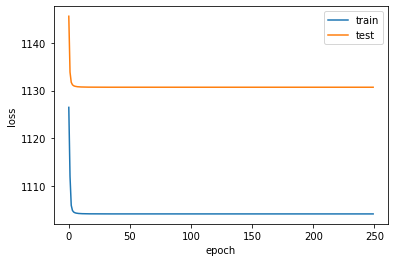

In [53]:
plt.plot(training.history['loss'], label='train');
plt.plot(training.history['val_loss'], label='test');
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

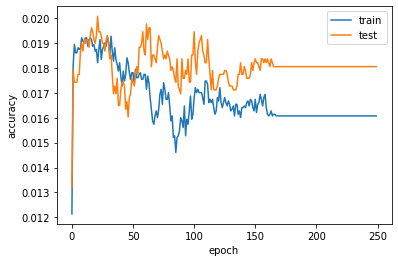

In [54]:
plt.plot(training.history['accuracy'], label='train');
plt.plot(training.history['val_accuracy'], label='test');
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend();